In [1]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

%matplotlib nbagg

In [36]:
calibration_curve?

In [2]:
X, y = datasets.make_classification(n_samples=100000, n_features=20,n_informative=2, n_redundant=2)

In [3]:
# Create Train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.01, random_state=0)


/home/hope/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
#Create classifiers
rf = RandomForestClassifier(n_estimators=100)
nb = GaussianNB()
svm = LinearSVC(C=1.0)
lm = LogisticRegression()

In [5]:
Classf = [(rf,'Random Forest'),(nb,'Naive Bayes'),(svm,'Simple Vector Classification'),(lm,'Logistic Regression')]

<IPython.core.display.Javascript object>


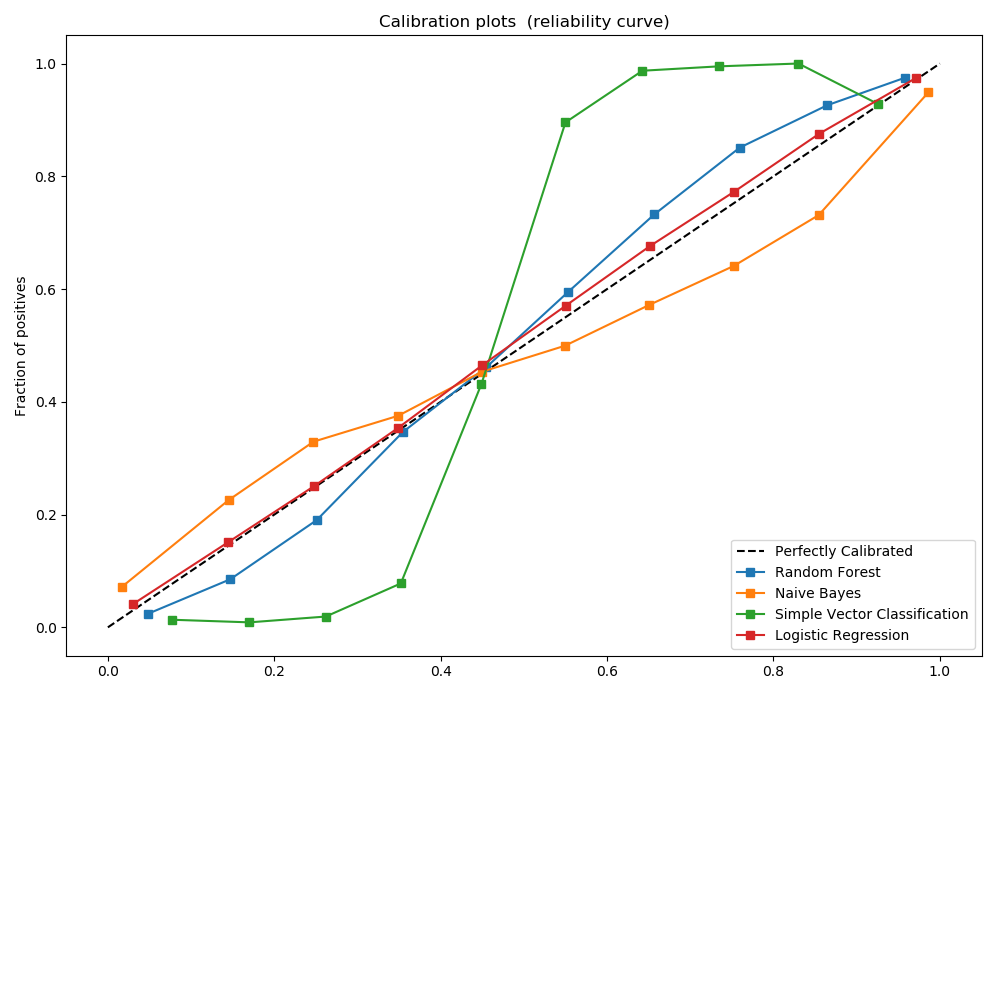

In [8]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)


ax1.plot([0,1],[0,1],'k--',label='Perfectly Calibrated')

for clf , name in Classf:
    clf.fit(X_train,y_train)
    
    if hasattr(clf,'predict_proba'):
        prob_pos = clf.predict_proba(X_test)[:,1] #make 1d
    else: #Decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min())/(prob_pos.max()-prob_pos.min())
    
    fraction_of_positives , mean_predicted_value = \
        calibration_curve(y_test,prob_pos,n_bins=10)
    
    ax1.plot(mean_predicted_value,fraction_of_positives,'s-',label='%s' %(name))
    

        
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

plt.tight_layout()